In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
section_1_scores = pd.read_csv("./data/Section 1 grades.csv")
section_2_scores = pd.read_csv("./data/Section 2 grades.csv")
section_3_scores = pd.read_csv("./data/Section 3 grades.csv")

In [4]:
all_sections_data = pd.concat([section_1_scores,section_2_scores,section_3_scores], ignore_index=True).drop(columns=["Unnamed: 0"])
all_sections_data.head()

,ID,NetID,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,...,Exam 3 Scores,total_homework_grades,Average_hw_scores,final_hw_scores,Total Quiz Grades,Average Quiz Scores,final_Quiz_scores,Final_score,Ceiling_score,Final Grade
0,1234567,wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,...,0.90,0.808108,0.799405,0.808108,0.608696,0.602139,0.608696,0.745852,75.0,C
1,3456789,txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,...,0.64,0.785135,0.785940,0.785940,0.594203,0.585399,0.594203,0.722637,73.0,C
2,2546149,rxs30280,richard.saunders@univ.edu,1,Richard,Saunders,53.0,80,56,80,...,0.64,0.710811,0.708837,0.710811,0.826087,0.836384,0.836384,0.756740,76.0,C
3,2886234,edh14938,emily.houston@univ.edu,1,Emily,Houston,54.0,80,60,80,...,0.87,0.758108,0.766294,0.766294,0.724638,0.720216,0.724638,0.782409,79.0,C
4,5704583,rjb91830,richard.bennett@univ.edu,1,Richard,Bennett,76.0,80,75,80,...,0.88,0.829730,0.827508,0.829730,0.623188,0.648653,0.648653,0.788488,79.0,C


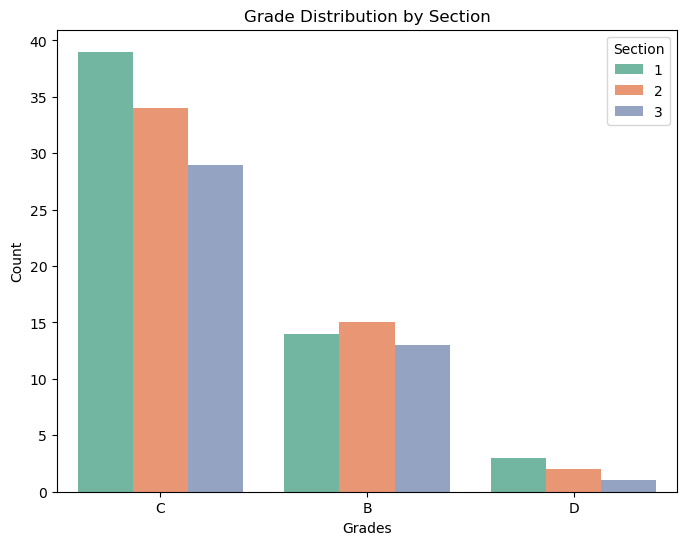

In [5]:
def plot_grade_distribution(data):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x='Final Grade', hue='Section', palette='Set2')
    plt.title("Grade Distribution by Section")
    plt.xlabel("Grades")
    plt.ylabel("Count")
    plt.legend(title="Section")
    plt.show()

plot_grade_distribution(all_sections_data)

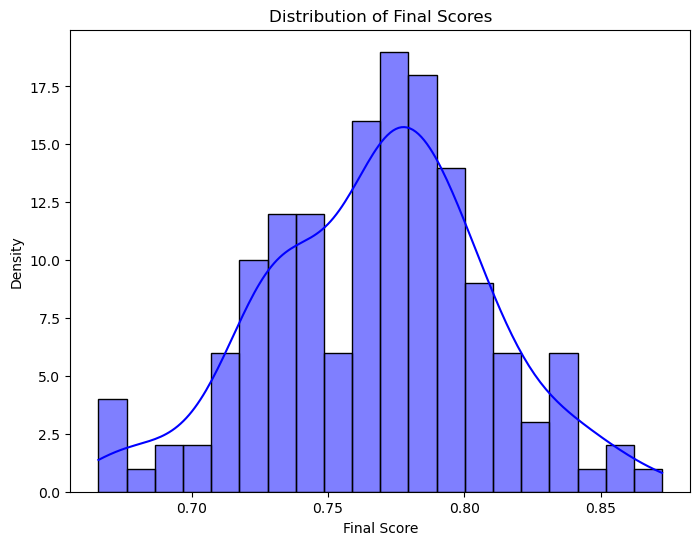

In [6]:
def plot_score_distribution(data):
    plt.figure(figsize=(8, 6))
    sns.histplot(data['Final_score'], kde=True, bins=20, color="blue")
    plt.title("Distribution of Final Scores")
    plt.xlabel("Final Score")
    plt.ylabel("Density")
    plt.show()

plot_score_distribution(all_sections_data)

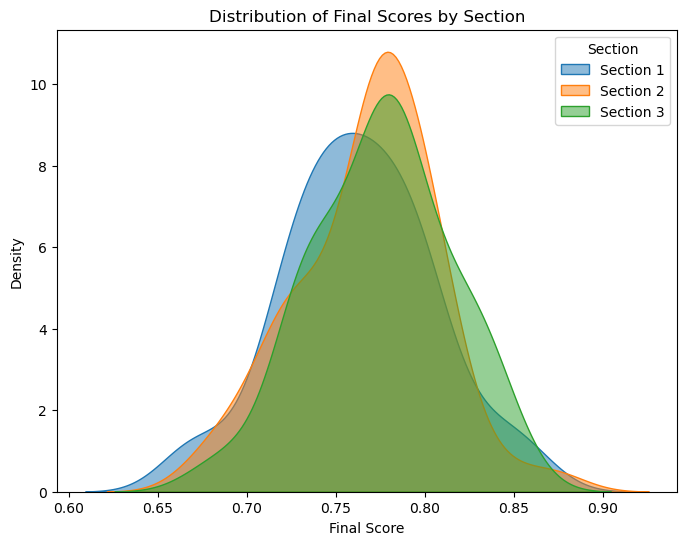

In [10]:
def plot_score_distribution(data):
    plt.figure(figsize=(8, 6))
    for section in data['Section'].unique():
        subset = data[data['Section'] == section]
        sns.kdeplot(subset['Final_score'], fill=True, alpha=0.5, label=f'Section {section}')
    plt.title("Distribution of Final Scores by Section")
    plt.xlabel("Final Score")
    plt.ylabel("Density")
    plt.legend(title="Section")
    plt.show()

plot_score_distribution(all_sections_data)


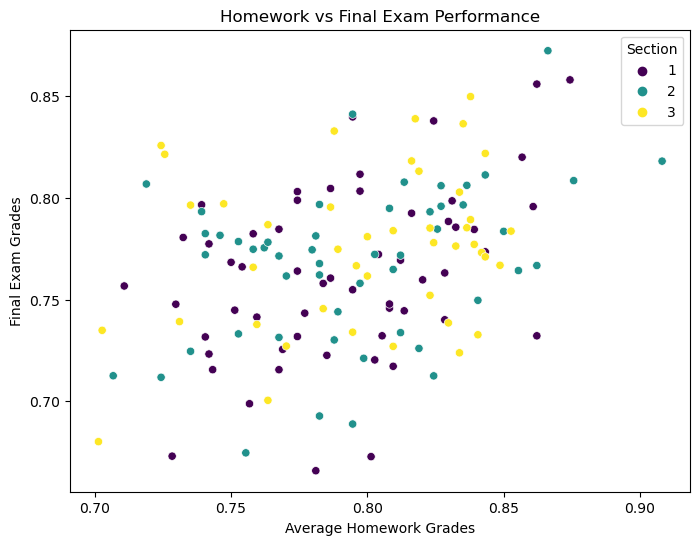

In [11]:
def plot_homework_vs_exam(data):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x='total_homework_grades', y='Final_score', hue='Section', palette='viridis', data=data
    )
    plt.title("Homework vs Final Exam Performance")
    plt.xlabel("Average Homework Grades")
    plt.ylabel("Final Exam Grades")
    plt.legend(title="Section")
    plt.show()

plot_homework_vs_exam(all_sections_data)

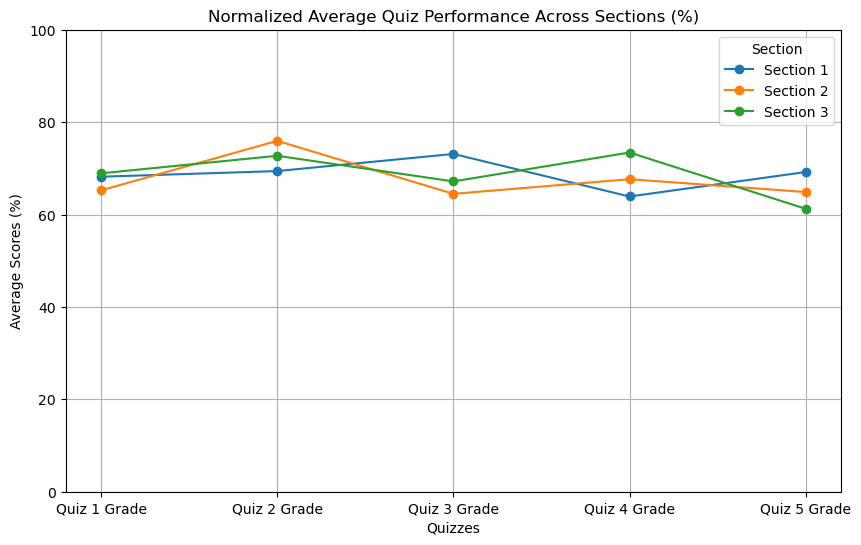

In [23]:
def plot_quiz_trends_combined_normalized(data):
    # Define quiz max scores
    QUIZ_MAX_SCORES = {"Quiz 1": 11, "Quiz 2": 15, "Quiz 3": 17, "Quiz 4": 14, "Quiz 5": 12}
    quiz_columns = [col for col in data.columns if "Quiz" in col and "Grade" in col and "Total" not in col]

    plt.figure(figsize=(10, 6))

    for section in data['Section'].unique():
        section_data = data[data['Section'] == section]
        normalized_scores = {
            quiz: (section_data[quiz] / QUIZ_MAX_SCORES[quiz.rstrip(' Grade')]) * 100 for quiz in quiz_columns
        }
        avg_quiz_scores = pd.DataFrame(normalized_scores).mean()
        plt.plot(avg_quiz_scores, marker="o", label=f"Section {section}")

    plt.title("Normalized Average Quiz Performance Across Sections (%)")
    plt.xlabel("Quizzes")
    plt.ylim(0, 100)
    plt.ylabel("Average Scores (%)")
    plt.grid()
    plt.legend(title="Section")
    plt.show()

# Call the function to plot combined quiz trends
plot_quiz_trends_combined_normalized(all_sections_data)


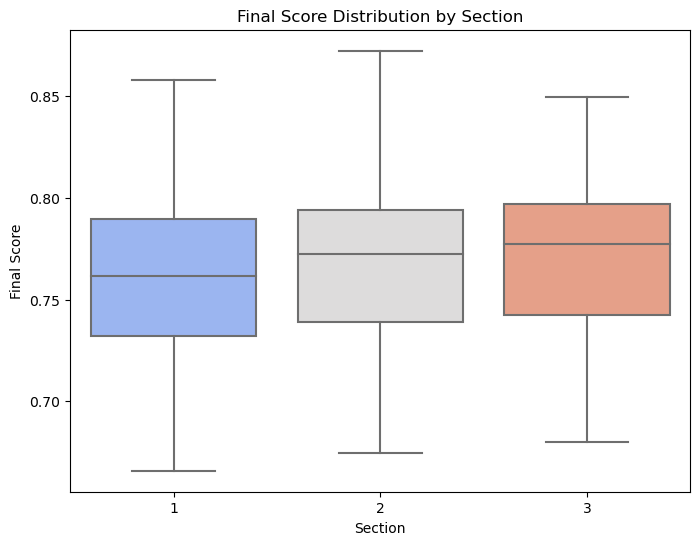

In [18]:
def plot_final_score_boxplot(data):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x='Section', y='Final_score', palette='coolwarm')
    plt.title("Final Score Distribution by Section")
    plt.xlabel("Section")
    plt.ylabel("Final Score")
    plt.show()

plot_final_score_boxplot(all_sections_data)

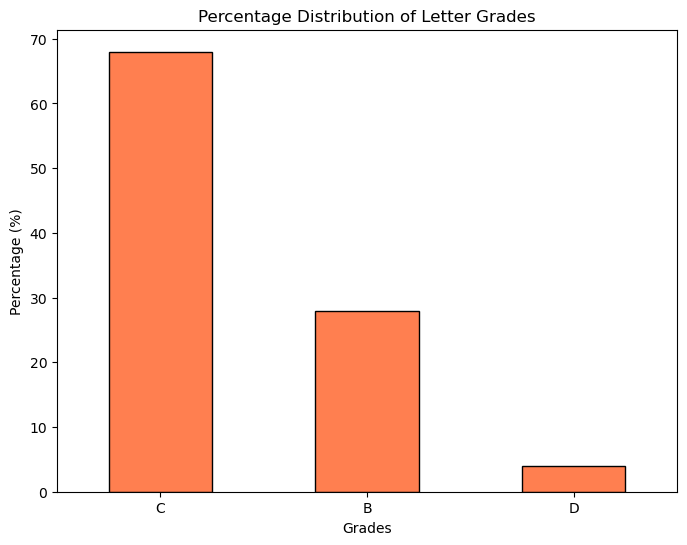

In [27]:
def plot_grade_distribution_percentage(data):
    grade_distribution = data['Final Grade'].value_counts(normalize=True) * 100
    plt.figure(figsize=(8, 6))
    grade_distribution.plot(kind='bar', color='coral', edgecolor='black')
    plt.title("Percentage Distribution of Letter Grades")
    plt.xlabel("Grades")
    plt.ylabel("Percentage (%)")
    plt.xticks(rotation=0)
    plt.show()

plot_grade_distribution_percentage(all_sections_data)



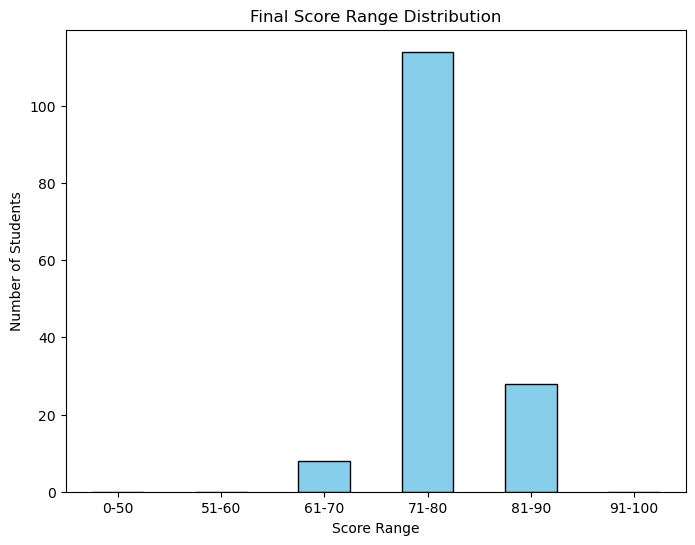

In [28]:
def plot_score_range(data):
    bins = [0, 50, 60, 70, 80, 90, 100]
    labels = ['0-50', '51-60', '61-70', '71-80', '81-90', '91-100']
    data['Score Range'] = pd.cut(data['Final_score'] * 100, bins=bins, labels=labels, include_lowest=True)
    score_range_distribution = data['Score Range'].value_counts(sort=False)
    
    plt.figure(figsize=(8, 6))
    score_range_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title("Final Score Range Distribution")
    plt.xlabel("Score Range")
    plt.ylabel("Number of Students")
    plt.xticks(rotation=0)
    plt.show()

plot_score_range(all_sections_data)


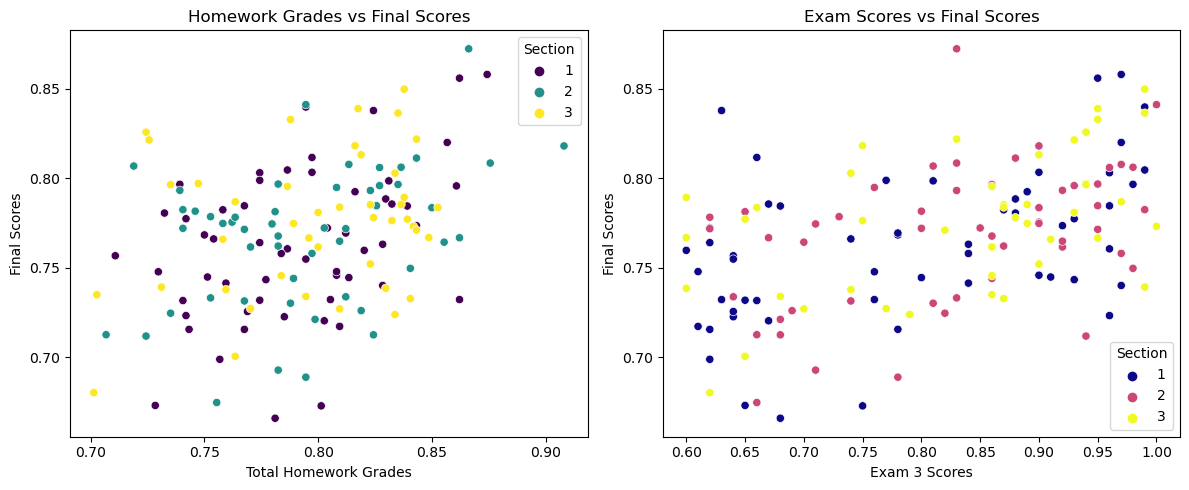

In [29]:
def plot_homework_exam_vs_final(data):
    plt.figure(figsize=(12, 5))
    # Homework vs Final Score
    plt.subplot(1, 2, 1)
    sns.scatterplot(x='total_homework_grades', y='Final_score', hue='Section', palette='viridis', data=data)
    plt.title("Homework Grades vs Final Scores")
    plt.xlabel("Total Homework Grades")
    plt.ylabel("Final Scores")

    # Exam vs Final Score
    plt.subplot(1, 2, 2)
    sns.scatterplot(x='Exam 3 Scores', y='Final_score', hue='Section', palette='plasma', data=data)
    plt.title("Exam Scores vs Final Scores")
    plt.xlabel("Exam 3 Scores")
    plt.ylabel("Final Scores")
    
    plt.tight_layout()
    plt.show()

plot_homework_exam_vs_final(all_sections_data)


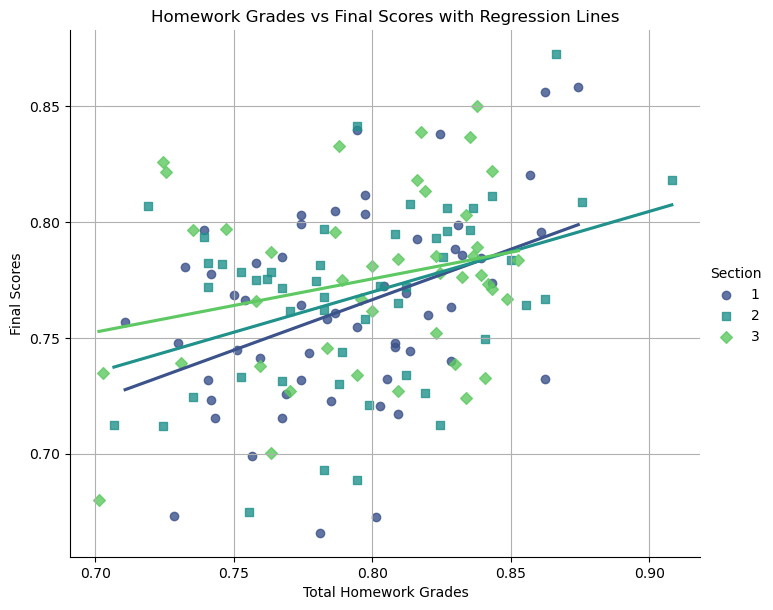

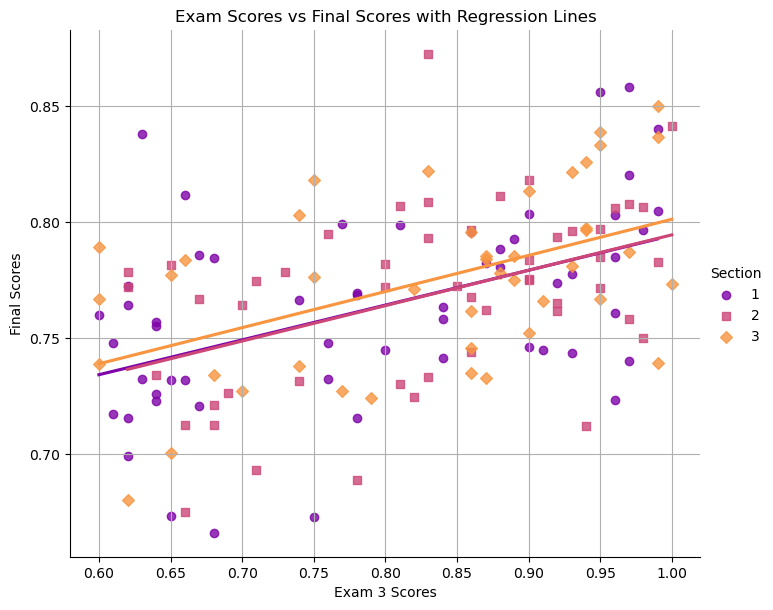

In [30]:
def plot_regression_lines(data):
    # Homework vs Final Score with Regression Lines
    sns.lmplot(
        x='total_homework_grades',
        y='Final_score',
        hue='Section',
        data=data,
        height=6,
        aspect=1.2,
        markers=["o", "s", "D"],
        palette="viridis",
        ci=None
    )
    plt.title("Homework Grades vs Final Scores with Regression Lines")
    plt.xlabel("Total Homework Grades")
    plt.ylabel("Final Scores")
    plt.grid()
    plt.show()

    # Exam 3 Scores vs Final Score with Regression Lines
    sns.lmplot(
        x='Exam 3 Scores',
        y='Final_score',
        hue='Section',
        data=data,
        height=6,
        aspect=1.2,
        markers=["o", "s", "D"],
        palette="plasma",
        ci=None
    )
    plt.title("Exam Scores vs Final Scores with Regression Lines")
    plt.xlabel("Exam 3 Scores")
    plt.ylabel("Final Scores")
    plt.grid()
    plt.show()

# Call the function to plot regression lines
plot_regression_lines(all_sections_data)


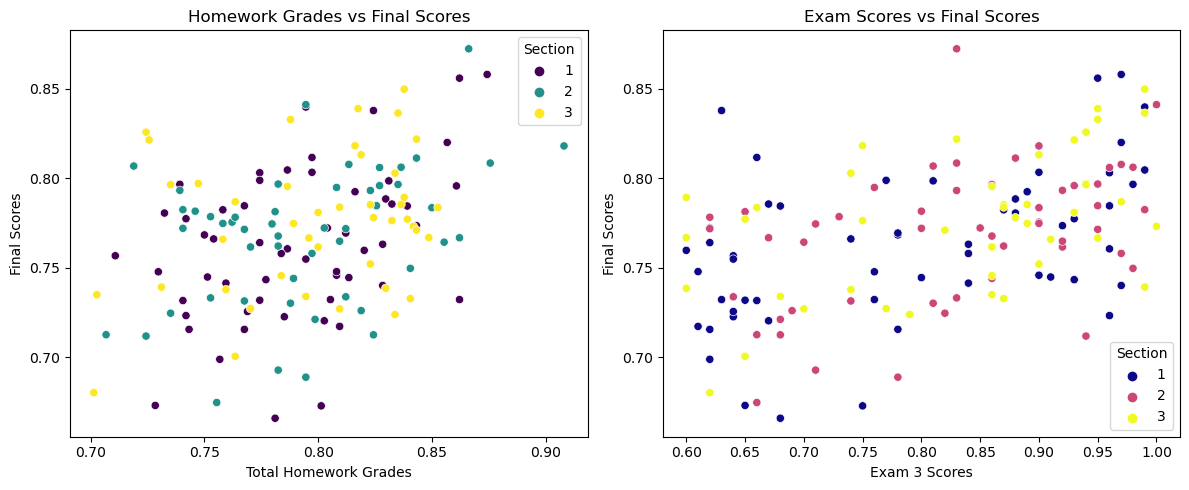

In [31]:
def plot_homework_exam_vs_final(data):
    plt.figure(figsize=(12, 5))
    # Homework vs Final Score
    plt.subplot(1, 2, 1)
    sns.scatterplot(x='total_homework_grades', y='Final_score', hue='Section', palette='viridis', data=data)
    plt.title("Homework Grades vs Final Scores")
    plt.xlabel("Total Homework Grades")
    plt.ylabel("Final Scores")

    # Exam vs Final Score
    plt.subplot(1, 2, 2)
    sns.scatterplot(x='Exam 3 Scores', y='Final_score', hue='Section', palette='plasma', data=data)
    plt.title("Exam Scores vs Final Scores")
    plt.xlabel("Exam 3 Scores")
    plt.ylabel("Final Scores")
    
    plt.tight_layout()
    plt.show()

plot_homework_exam_vs_final(all_sections_data)


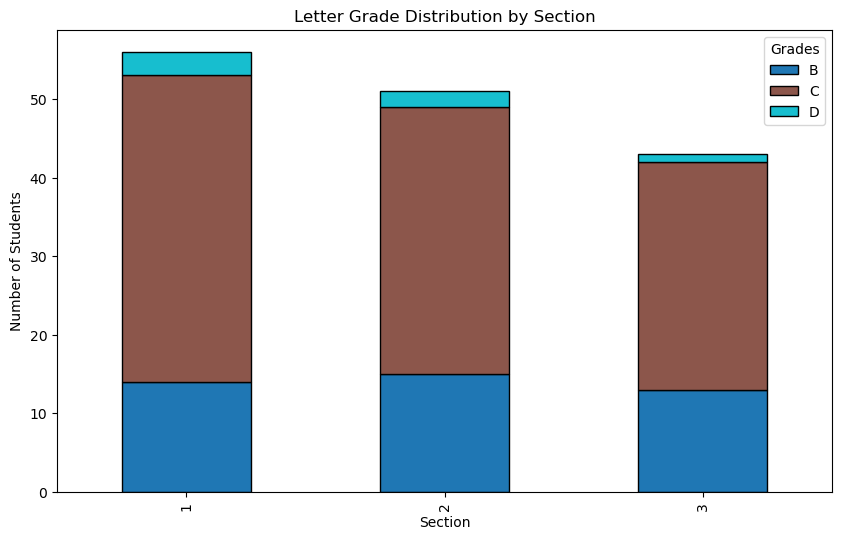

In [32]:
def plot_section_grade_distribution(data):
    grade_section_distribution = data.groupby(['Section', 'Final Grade']).size().unstack().fillna(0)
    grade_section_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab10', edgecolor='black')
    plt.title("Letter Grade Distribution by Section")
    plt.xlabel("Section")
    plt.ylabel("Number of Students")
    plt.legend(title="Grades")
    plt.show()

plot_section_grade_distribution(all_sections_data)


In [34]:
top_10_students = all_sections_data.nlargest(10, 'Final_score')

# Displaying the names of the top 10 students
top_10_student_names = top_10_students[['First Name', 'Last Name', 'Final_score', 'Section']]
top_10_student_names.reset_index(drop=True, inplace=True)

In [35]:
top_10_student_names

,First Name,Last Name,Final_score,Section
0,Marcia,Stevens,0.872429,2
1,Nicole,Mann,0.858093,1
2,John,Harris,0.856023,1
3,Amy,White,0.849874,3
4,Charles,Campbell,0.841221,2
5,Tamara,Warren,0.839880,1
6,Nicole,Patterson,0.838962,3
7,Paige,King,0.837911,1
8,Felicia,Simpson,0.836508,3
9,Brett,Miranda,0.832940,3
